In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots

In [3]:
#Read the data

df = pd.read_csv(r"C:\Users\shred\Desktop\Portofolio\4\archive\movies.csv")

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Check for missing data

for col in df.columns:
     print(df[col].isnull().value_counts(), "\n")

name
False    7668
Name: count, dtype: int64 

rating
False    7591
True       77
Name: count, dtype: int64 

genre
False    7668
Name: count, dtype: int64 

year
False    7668
Name: count, dtype: int64 

released
False    7666
True        2
Name: count, dtype: int64 

score
False    7665
True        3
Name: count, dtype: int64 

votes
False    7665
True        3
Name: count, dtype: int64 

director
False    7668
Name: count, dtype: int64 

writer
False    7665
True        3
Name: count, dtype: int64 

star
False    7667
True        1
Name: count, dtype: int64 

country
False    7665
True        3
Name: count, dtype: int64 

budget
False    5497
True     2171
Name: count, dtype: int64 

gross
False    7479
True      189
Name: count, dtype: int64 

company
False    7651
True       17
Name: count, dtype: int64 

runtime
False    7664
True        4
Name: count, dtype: int64 



In [6]:
# Delete missing values

df = df.dropna()

In [7]:
# Checking the modified dataframe
for col in df.columns:
     print(df[col].isnull().value_counts(), "\n")

name
False    5421
Name: count, dtype: int64 

rating
False    5421
Name: count, dtype: int64 

genre
False    5421
Name: count, dtype: int64 

year
False    5421
Name: count, dtype: int64 

released
False    5421
Name: count, dtype: int64 

score
False    5421
Name: count, dtype: int64 

votes
False    5421
Name: count, dtype: int64 

director
False    5421
Name: count, dtype: int64 

writer
False    5421
Name: count, dtype: int64 

star
False    5421
Name: count, dtype: int64 

country
False    5421
Name: count, dtype: int64 

budget
False    5421
Name: count, dtype: int64 

gross
False    5421
Name: count, dtype: int64 

company
False    5421
Name: count, dtype: int64 

runtime
False    5421
Name: count, dtype: int64 



In [8]:
#Check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
#Changing dtypes to remove unnecessary decimals

df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df["runtime"] = df["runtime"].astype("int64")
df["votes"] = df["votes"].astype("int64")

In [10]:
df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100


In [11]:
#Create a correct year column (fix disparity between year and released columns)

# extracting the 
df['released_year'] = df['released'].str.extract(r'(\d{4})').astype(int)

#checking if the years match
df['year_match'] = df['year'] == df['released_year']

df["year_match"].value_counts()
#We consider the "released_year" we extracted as the correct value

year_match
True     4713
False     708
Name: count, dtype: int64

In [12]:
# Sorting by gross

df.sort_values(by=["gross"],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,year_match
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,True
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,True
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,True
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015,False
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994,False
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001,False
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982,True


In [13]:
#Check for duplicates

duplicates = df[df.duplicated()]
if duplicates.empty:
    print("No duplicates found across all columns.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found across all columns.


In [14]:
# Check for correlation between the budget and gross columns

# Calculate the Pearson correlation coefficient
correlation_coefficient = df['budget'].corr(df['gross'])

# Print the correlation coefficient
print("Pearson correlation coefficient between budget and gross:", correlation_coefficient)

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    print("There is a positive correlation between budget and gross.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between budget and gross.")
else:
    print("There is no linear correlation between budget and gross.")


Pearson correlation coefficient between budget and gross: 0.7402465439219628
There is a positive correlation between budget and gross.


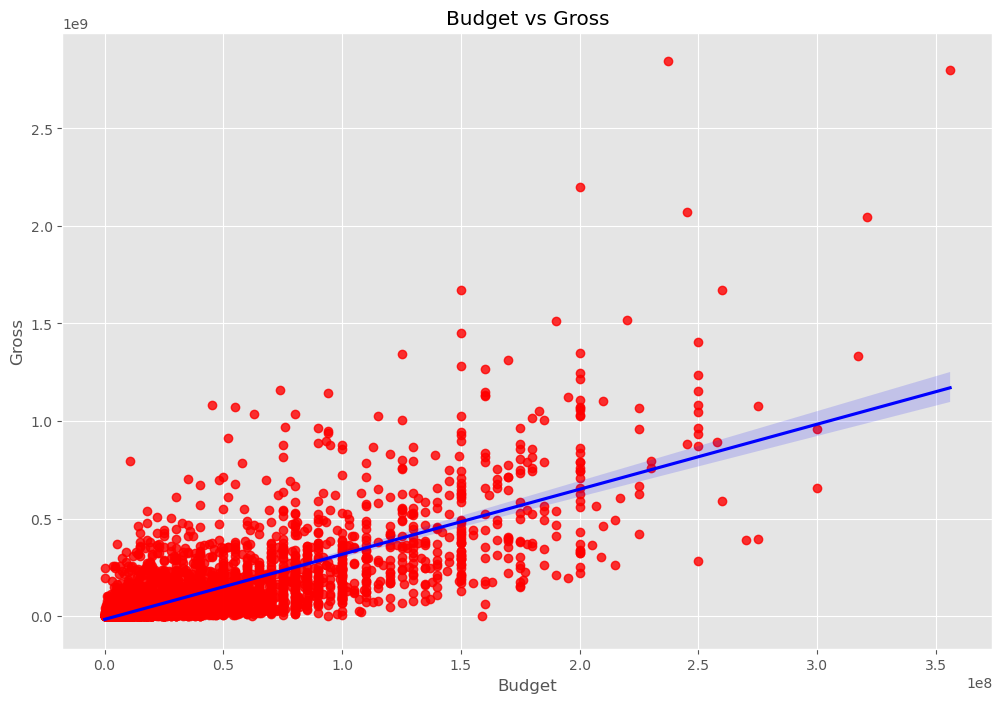

In [20]:
sns.regplot(x='budget', y='gross', data=df, color='blue', line_kws={"color":"blue"}, scatter_kws={"color":"red"})
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross')
plt.show()

In [25]:
#Create a heatmap with the correlation between the numeric values of our df
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime,released_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
released_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


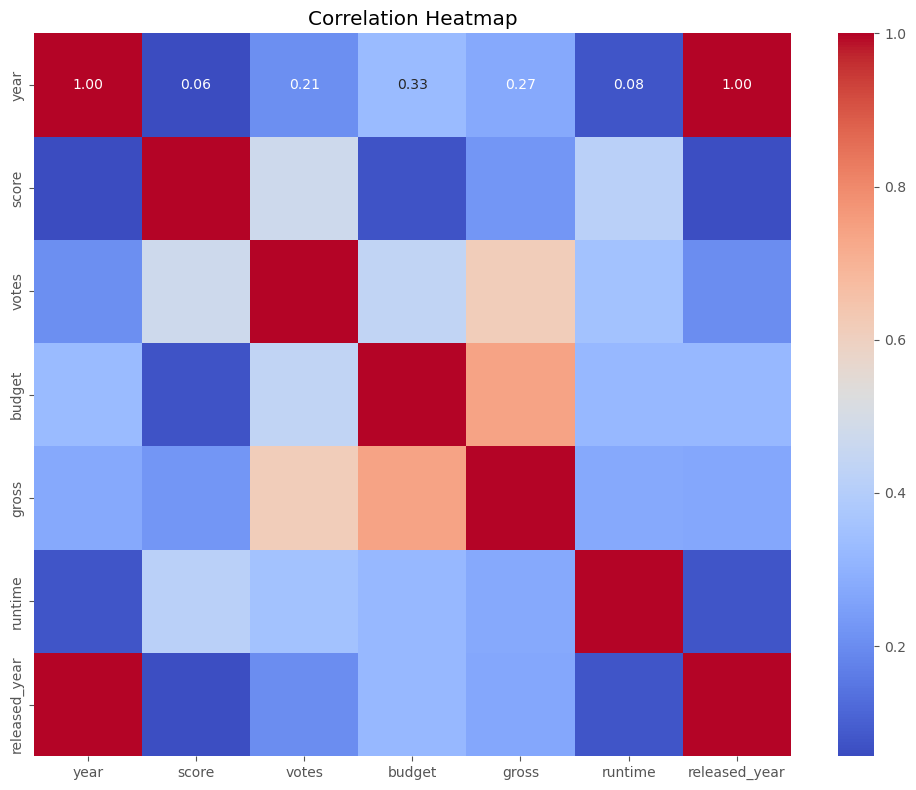

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [29]:
#Create a heatmap with the correlation between the non-numeric values of our df
from sklearn.preprocessing import OrdinalEncoder

# Select non-numeric columns
non_numeric_df = df.select_dtypes(exclude=['number'])

# Convert non-numeric columns to numerical using label encoding
encoder = OrdinalEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(non_numeric_df), columns=non_numeric_df.columns)

# Compute Spearman correlation matrix
spearman_correlation_matrix = encoded_df.corr(method='spearman')
spearman_correlation_matrix


,name,rating,genre,released,director,writer,star,country,company,year_match
name,1.000000,-0.021980,0.008213,-0.006341,0.014933,0.013023,-0.007027,-0.026431,0.021247,0.009739
rating,-0.021980,1.000000,0.167778,0.031301,0.007809,0.002124,0.019408,-0.011824,-0.108557,-0.115747
genre,0.008213,0.167778,1.000000,0.022254,-0.007466,0.015393,0.003449,-0.015225,-0.080808,-0.135771
released,-0.006341,0.031301,0.022254,1.000000,0.002797,0.007941,0.015392,-0.021012,0.002086,0.119666
director,0.014933,0.007809,-0.007466,0.002797,1.000000,0.262486,0.036264,-0.007505,-0.009778,-0.033609
writer,0.013023,0.002124,0.015393,0.007941,0.262486,1.000000,0.018573,0.019264,-0.004120,-0.016209
star,-0.007027,0.019408,0.003449,0.015392,0.036264,0.018573,1.000000,-0.011795,0.011481,0.020274
country,-0.026431,-0.011824,-0.015225,-0.021012,-0.007505,0.019264,-0.011795,1.000000,0.056917,0.191972
company,0.021247,-0.108557,-0.080808,0.002086,-0.009778,-0.004120,0.011481,0.056917,1.000000,0.101649
year_match,0.009739,-0.115747,-0.135771,0.119666,-0.033609,-0.016209,0.020274,0.191972,0.101649,1.000000


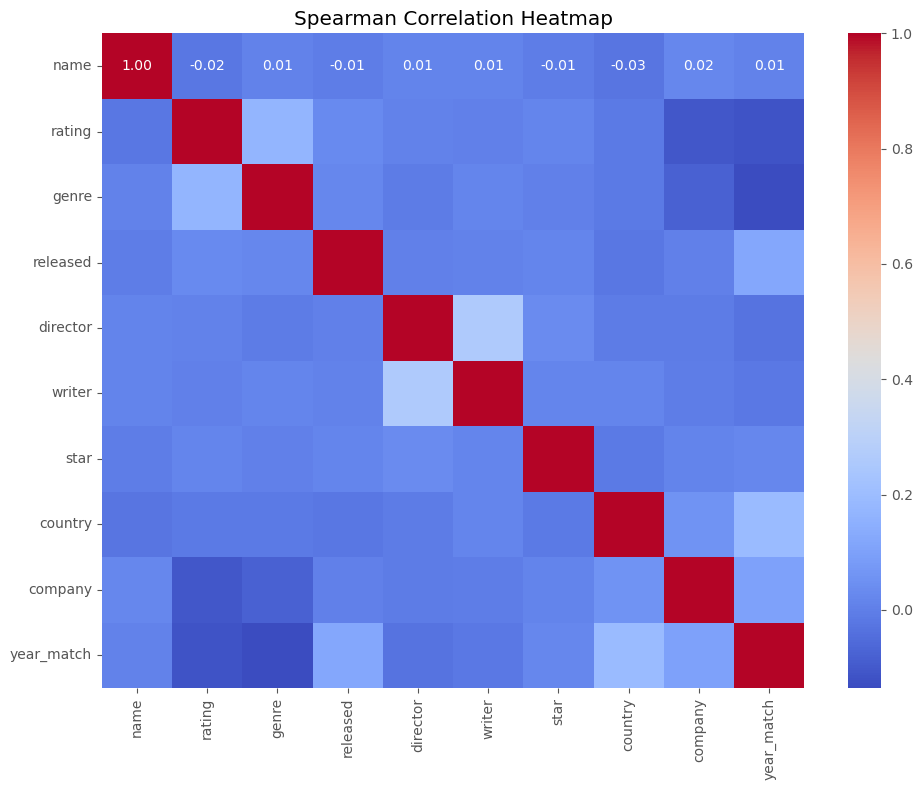

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()
#no significant correlation